# Lab | Pandas

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv

The data includes information such as customer ID, state, gender, education, income, and other variables that can be used to perform various analyses.

Throughout the lab, we will be using the pandas library in Python to manipulate and analyze the data. Pandas is a powerful library that provides various data manipulation and analysis tools, including the ability to load and manipulate data from a variety of sources, including CSV files.

### Data Description

- Customer - Customer ID

- ST - State where customers live

- Gender - Gender of the customer

- Education - Background education of customers 

- Customer Lifetime Value - Customer lifetime value(CLV) is the total revenue the client will derive from their entire relationship with a customer. In other words, is the predicted or calculated value of a customer over their entire duration as a policyholder with the insurance company. It is an estimation of the net profit that the insurance company expects to generate from a customer throughout their relationship with the company. Customer Lifetime Value takes into account factors such as the duration of the customer's policy, premium payments, claim history, renewal likelihood, and potential additional services or products the customer may purchase. It helps insurers assess the long-term profitability and value associated with retaining a particular customer.

- Income - Customers income

- Monthly Premium Auto - Amount of money the customer pays on a monthly basis as a premium for their auto insurance coverage. It represents the recurring cost that the insured person must pay to maintain their insurance policy and receive coverage for potential damages, accidents, or other covered events related to their vehicle.

- Number of Open Complaints - Number of complaints the customer opened

- Policy Type - There are three type of policies in car insurance (Corporate Auto, Personal Auto, and Special Auto)

- Vehicle Class - Type of vehicle classes that customers have Two-Door Car, Four-Door Car SUV, Luxury SUV, Sports Car, and Luxury Car

- Total Claim Amount - the sum of all claims made by the customer. It represents the total monetary value of all approved claims for incidents such as accidents, theft, vandalism, or other covered events.


External Resources: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

## Challenge 1: Understanding the data

In this challenge, you will use pandas to explore a given dataset. Your task is to gain a deep understanding of the data by analyzing its characteristics, dimensions, and statistical properties.

- Identify the dimensions of the dataset by determining the number of rows and columns it contains.
- Determine the data types of each column and evaluate whether they are appropriate for the nature of the variable. You should also provide suggestions for fixing any incorrect data types.
- Identify the number of unique values for each column and determine which columns appear to be categorical. You should also describe the unique values of each categorical column and the range of values for numerical columns, and give your insights.
- Compute summary statistics such as mean, median, mode, standard deviation, and quartiles to understand the central tendency and distribution of the data for numerical columns. You should also provide your conclusions based on these summary statistics.
- Compute summary statistics for categorical columns and providing your conclusions based on these statistics.

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Identify the dimensions of the dataset by determining the number of rows and columns it contains.
df=pd.read_csv ("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv")
df.shape

(4008, 11)

In [37]:
df.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [23]:
# Determine the data types of each column and evaluate whether they
# are appropriate for the nature of the variable. You should also
# provide suggestions for fixing any incorrect data types.
df.dtypes

# question : is object a string? Should we fix object to string?

Customer                      object
ST                            object
GENDER                        object
Education                     object
Customer Lifetime Value       object
Income                       float64
Monthly Premium Auto         float64
Number of Open Complaints     object
Policy Type                   object
Vehicle Class                 object
Total Claim Amount           float64
dtype: object

In [28]:
# Identify the number of unique values for each column and determine
# which columns appear to be categorical. 

df.nunique()
categorical_variables = ["GENDER", "ST", "Education", "Policy Type", "Vehicle Class"]
print("Frequency counts for categorical variables:")
for column in categorical_variables:
    frequency_counts = df[column].value_counts()
    print(frequency_counts)

Frequency counts for categorical variables:
GENDER
F         457
M         413
Male       39
female     28
Femal      17
Name: count, dtype: int64
ST
Oregon        320
California    211
Arizona       186
Cali          120
Nevada         98
Washington     81
WA             30
AZ             25
Name: count, dtype: int64
Education
Bachelor                324
College                 313
High School or Below    296
Master                   94
Doctor                   37
Bachelors                 7
Name: count, dtype: int64
Policy Type
Personal Auto     780
Corporate Auto    234
Special Auto       57
Name: count, dtype: int64
Vehicle Class
Four-Door Car    576
Two-Door Car     205
SUV              199
Sports Car        57
Luxury SUV        20
Luxury Car        14
Name: count, dtype: int64


In [34]:
# You should also describe the unique values of each categorical 
# column and the range of values for numerical columns, and give your insights.

# Compute summary statistics such as mean, median, mode, standard deviation,
# and quartiles to understand the central tendency and distribution of the data
# for numerical columns. You should also provide your conclusions based on these summary statistics.

numerical_variables = ["Income","Monthly Premium Auto",	"Total Claim Amount"]
print("Descriptive statistics for numerical variables:")
print(df[numerical_variables].describe())
    
# Response : 
# We should clean the data. 
# For Gender : Combine Male to M and Femal/female to F. 
# For ST : Combine AZ to Arizona and WA to Washington and Cali to California.
# For Education : Bacherors to Bachelor.

# The range of values for numerical columns is min and max.

Descriptive statistics for numerical variables:
             Income  Monthly Premium Auto  Total Claim Amount
count   1071.000000           1071.000000         1071.000000
mean   39295.701214            193.234360          404.986909
std    30469.427060           1601.190369          293.027260
min        0.000000             61.000000            0.382107
25%    14072.000000             68.000000          202.157702
50%    36234.000000             83.000000          354.729129
75%    64631.000000            109.500000          532.800000
max    99960.000000          35354.000000         2893.239678


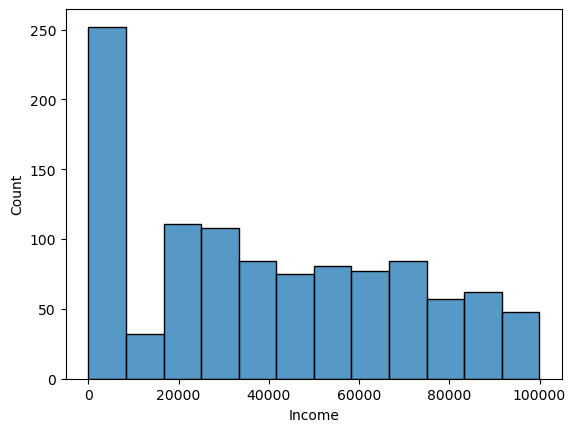

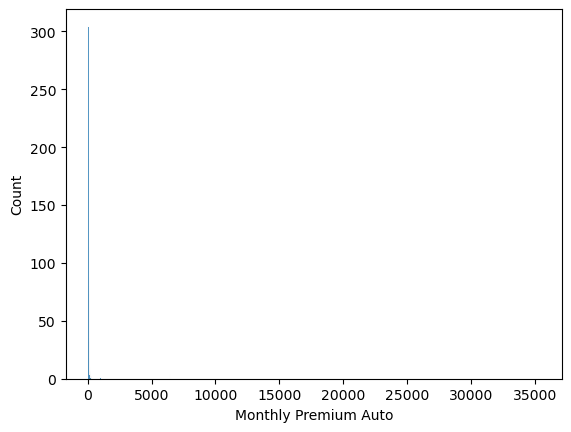

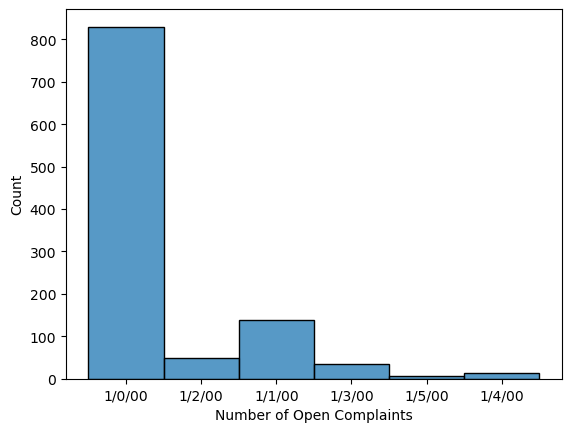

In [40]:
# Compute summary statistics for categorical columns and providing your conclusions based on these statistics.

for col in numerical_variables:    
    sns.histplot(x=col, data=df)
    plt.show()

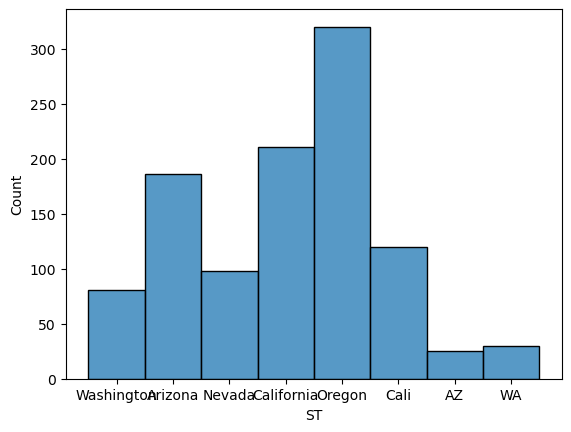

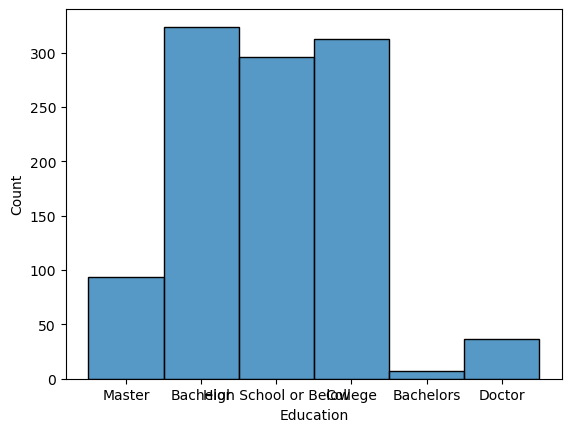

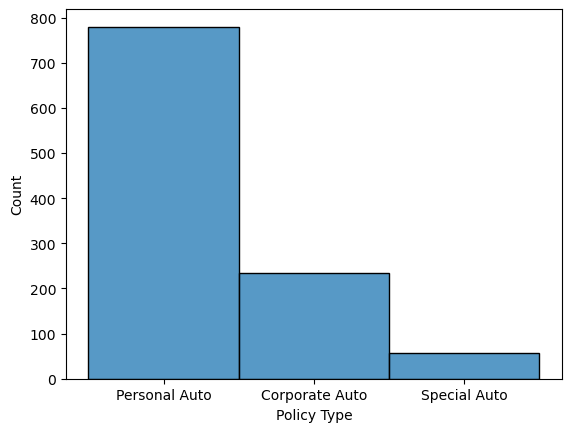

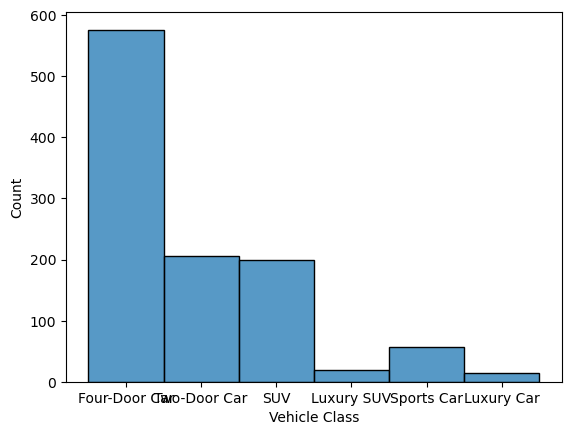

In [42]:
for col in categorical_variables:
    sns.histplot(x=col, data=df)
    plt.show()

## Challenge 2: analyzing the data

### Exercise 1

The marketing team wants to know the top 5 less common customer locations. Create a pandas Series object that contains the customer locations and their frequencies, and then retrieve the top 5 less common locations in ascending order.

In [46]:
frequency_counts = df["ST"].value_counts()
print(frequency_counts)

ST
Oregon        320
California    211
Arizona       186
Cali          120
Nevada         98
Washington     81
WA             30
AZ             25
Name: count, dtype: int64


In [47]:
df_cleaned = df.copy()

In [63]:
df_cleaned["ST"] 
for index, row in df.iterrows():
    if row["ST"]=="WA":
#         df_cleaned[index]="Washington"
#         print(index,row["ST"])
        df.at[index,"ST"]="Washington"

    

In [64]:
frequency_counts = df_cleaned["ST"].value_counts()
print(frequency_counts)
# I could not clean the data because WA does not get changed to Washington.

   


ST
Oregon        320
California    211
Arizona       186
Cali          120
Nevada         98
Washington     81
WA             30
AZ             25
Name: count, dtype: int64


In [70]:
frequency_counts.sort_values(ascending=True)[:5]


ST
AZ             25
WA             30
Washington     81
Nevada         98
Cali          120
Name: count, dtype: int64

### Exercise 2

The sales team wants to know the total number of policies sold for each type of policy. Create a pandas Series object that contains the policy types and their total number of policies sold, and then retrieve the policy type with the highest number of policies sold.

*Hint:*
- *Using value_counts() method simplifies this analysis.*
- *Futhermore, there is a method that returns the index of the maximum value in a column or row.*


In [72]:
frequency_counts = df["Policy Type"].value_counts()
print(frequency_counts)

Policy Type
Personal Auto     780
Corporate Auto    234
Special Auto       57
Name: count, dtype: int64


In [73]:
max_index = frequency_counts.idxmax()
print(max_index)

Personal Auto


### Exercise 3

The sales team wants to know if customers with Personal Auto have a lower income than those with Corporate Auto. How does the average income compare between the two policy types?

- Use *loc* to create two dataframes: one containing only Personal Auto policies and one containing only Corporate Auto policies.
- Calculate the average income for each policy.
- Print the results.

In [77]:
df[df['Policy Type']=="Personal Auto"]["Income"].mean()

38180.69871794872

In [78]:
df[df['Policy Type']=="Corporate Auto"]["Income"].mean()

41390.31196581197

### Bonus: Exercise 4


Your goal is to identify customers with a high policy claim amount.

Instructions:

- Review again the statistics for total claim amount to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount data. 

*Note: When analyzing data, we often want to focus on certain groups of values to gain insights. Percentiles are a useful tool to help us define these groups. A percentile is a measure that tells us what percentage of values in a dataset are below a certain value. For example, the 75th percentile represents the value below which 75% of the data falls. Similarly, the 25th percentile represents the value below which 25% of the data falls. When we talk about the top 25%, we are referring to the values that fall above the 75th percentile, which represent the top quarter of the data. On the other hand, when we talk about the bottom 25%, we are referring to the values that fall below the 25th percentile, which represent the bottom quarter of the data. By focusing on these groups, we can identify patterns and trends that may be useful for making decisions and taking action.*

*Hint: look for a method that gives you the percentile or quantile 0.75 and 0.25 for a Pandas Series.*

*Hint 2: check `Boolean selection according to the values of a single column` in https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9*

In [ ]:
# Your code here